In [1]:
from matplotlib import pyplot as plt
from tofpipe.connection.conn_zmq import Client
from tofpipe.protocol import protobuf, message
import time

In [14]:

protocol = protobuf.Protocol()

client = Client(protocol=protocol)
client.connect(host="192.168.1.13", port=5000)

def get_phase_from_raspi():
    global client
    max_tries = 10
    for i in range(max_tries):
    # set exposure to a reasonable value
        req = protocol.request()
        req.exposure = 80

        client.send(req)

        def get_frame():
            response = client.recv()
            which = response.response_type

            if which == message.ResponseType.FRAMEDATA:
                return response.frame

        frame = get_frame()
        if frame[0] == message.FrameType.PHASE:
            print("temperature of initial frame", frame[2][0])
            return frame[1]

Client Connected


In [13]:
client.close()

In [17]:
get_phase_from_raspi()

temperature of initial frame 39.57251739501953


array([[0.129889  , 0.05186431, 0.16466978, ..., 0.16540837, 0.17560765,
        0.14535661],
       [0.20777218, 0.121767  , 0.16799349, ..., 0.1581454 , 0.1975943 ,
        0.16085362],
       [0.17560765, 0.13958694, 0.129889  , ..., 0.13590418, 0.12317092,
        0.17094792],
       ...,
       [0.0915655 , 0.12074596, 0.1367635 , ..., 1.8531364 , 0.06735355,
        0.05409146],
       [0.185451  , 0.1578992 , 0.13651799, ..., 0.11589605, 1.85742   ,
        0.01305227],
       [0.09722089, 0.11857626, 0.13062555, ..., 0.05149312, 0.06683329,
        0.00217538]], dtype=float32)

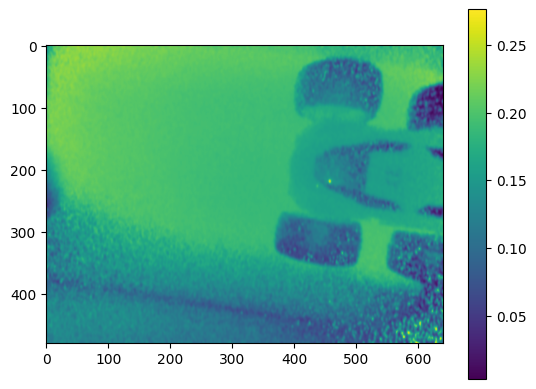

In [7]:
import numpy as np
from scipy.ndimage import gaussian_filter
import tofpipe

def preprocess_image(image):
    image = gaussian_filter(image, 1)
    image = np.repeat(image, 2, axis=0)
    image = gaussian_filter(image, 1)
    return image

phase2 = np.nan_to_num(phase)
phase2 = np.clip(phase2, 0, 0.5)
phase2 = preprocess_image(phase2)
plt.imshow(phase2)
plt.colorbar()
plt.show()

In [7]:
phase2

array([[0.17596343, 0.14535661, 0.13430831, ..., 0.16085362, 0.23096418,
        0.20334183],
       [0.17430313, 0.1438835 , 0.15716058, ..., 0.14768901, 0.14768901,
        0.20118648],
       [0.10823828, 0.17940268, 0.20298259, ..., 0.16466978, 0.2241292 ,
        0.2162336 ],
       ...,
       [0.1074725 , 0.12763794, 0.11742759, ..., 1.8585216 , 0.00316419,
        0.02740394],
       [0.1235538 , 0.15322135, 0.13234417, ..., 1.8039515 , 0.04283201,
        0.02292376],
       [0.11538552, 0.10508327, 0.08087996, ..., 0.        , 0.12253276,
        0.0691744 ]], dtype=float32)